In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('shop data.csv')
df

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,single,no
6,25-35,low,female,married,yes
7,<25,medium,male,married,no
8,<25,low,female,single,yes
9,>35,medium,female,married,yes


In [4]:
# level encoding
x = df.drop('buys', axis=1)
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


In [5]:
y = df.buys
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
14     no
15    yes
16    yes
17    yes
18    yes
19    yes
20     no
21    yes
Name: buys, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lr_x = LabelEncoder()
x = x.apply(lr_x.fit_transform)
x

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,0
7,1,2,1,0
8,1,1,0,1
9,2,2,0,0


In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=2)


In [9]:
xtrain

,age,income,gender,m_status
10,1,2,0,1
9,2,2,0,0
4,2,1,0,1
5,2,1,0,1
16,2,2,1,0
1,1,0,1,0
2,0,0,1,1
7,1,2,1,0
18,0,2,0,0
17,1,0,0,1


In [10]:
xtest

,age,income,gender,m_status
12,0,0,0,1
0,1,0,1,1
14,1,0,1,1
6,0,1,0,0
19,0,0,1,1
20,2,2,0,0
3,2,2,1,1


In [11]:
ytest

12    yes
0      no
14     no
6     yes
19    yes
20     no
3     yes
Name: buys, dtype: object

In [12]:
from sklearn.tree import DecisionTreeClassifier
dect = DecisionTreeClassifier()
treeModel = dect.fit(xtrain, ytrain)

In [13]:
treeModel

DecisionTreeClassifier()

In [14]:
treeModel.score(xtest, ytest)

0.5714285714285714

In [15]:
ytest

12    yes
0      no
14     no
6     yes
19    yes
20     no
3     yes
Name: buys, dtype: object

In [17]:
treeModel.predict(xtest)

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [18]:
# Performance Using cross_val_score

In [19]:
from sklearn.model_selection import cross_val_score

In [21]:
result = cross_val_score(DecisionTreeClassifier(), x, y, cv=5)
result

array([0.6 , 0.6 , 0.75, 0.25, 0.5 ])

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
resultLogIstice = cross_val_score(LogisticRegression(), x, y, cv=6)
resultLogIstice

array([0.25      , 0.75      , 0.75      , 0.75      , 0.66666667,
       0.66666667])

In [24]:
result.mean()

0.54

In [25]:
resultLogIstice.mean()

0.6388888888888888

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knResult = cross_val_score(KNeighborsClassifier(n_neighbors=3), x, y, cv=5)
knResult.mean()

0.51

[Text(0.5, 0.9, 'gender <= 0.5\ngini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Text(0.2, 0.7, 'age <= 1.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.3, 0.5, 'm_status <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.3, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8, 0.7, 'm_status <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.7, 0.5, 'age <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.3, 'age <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.9, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

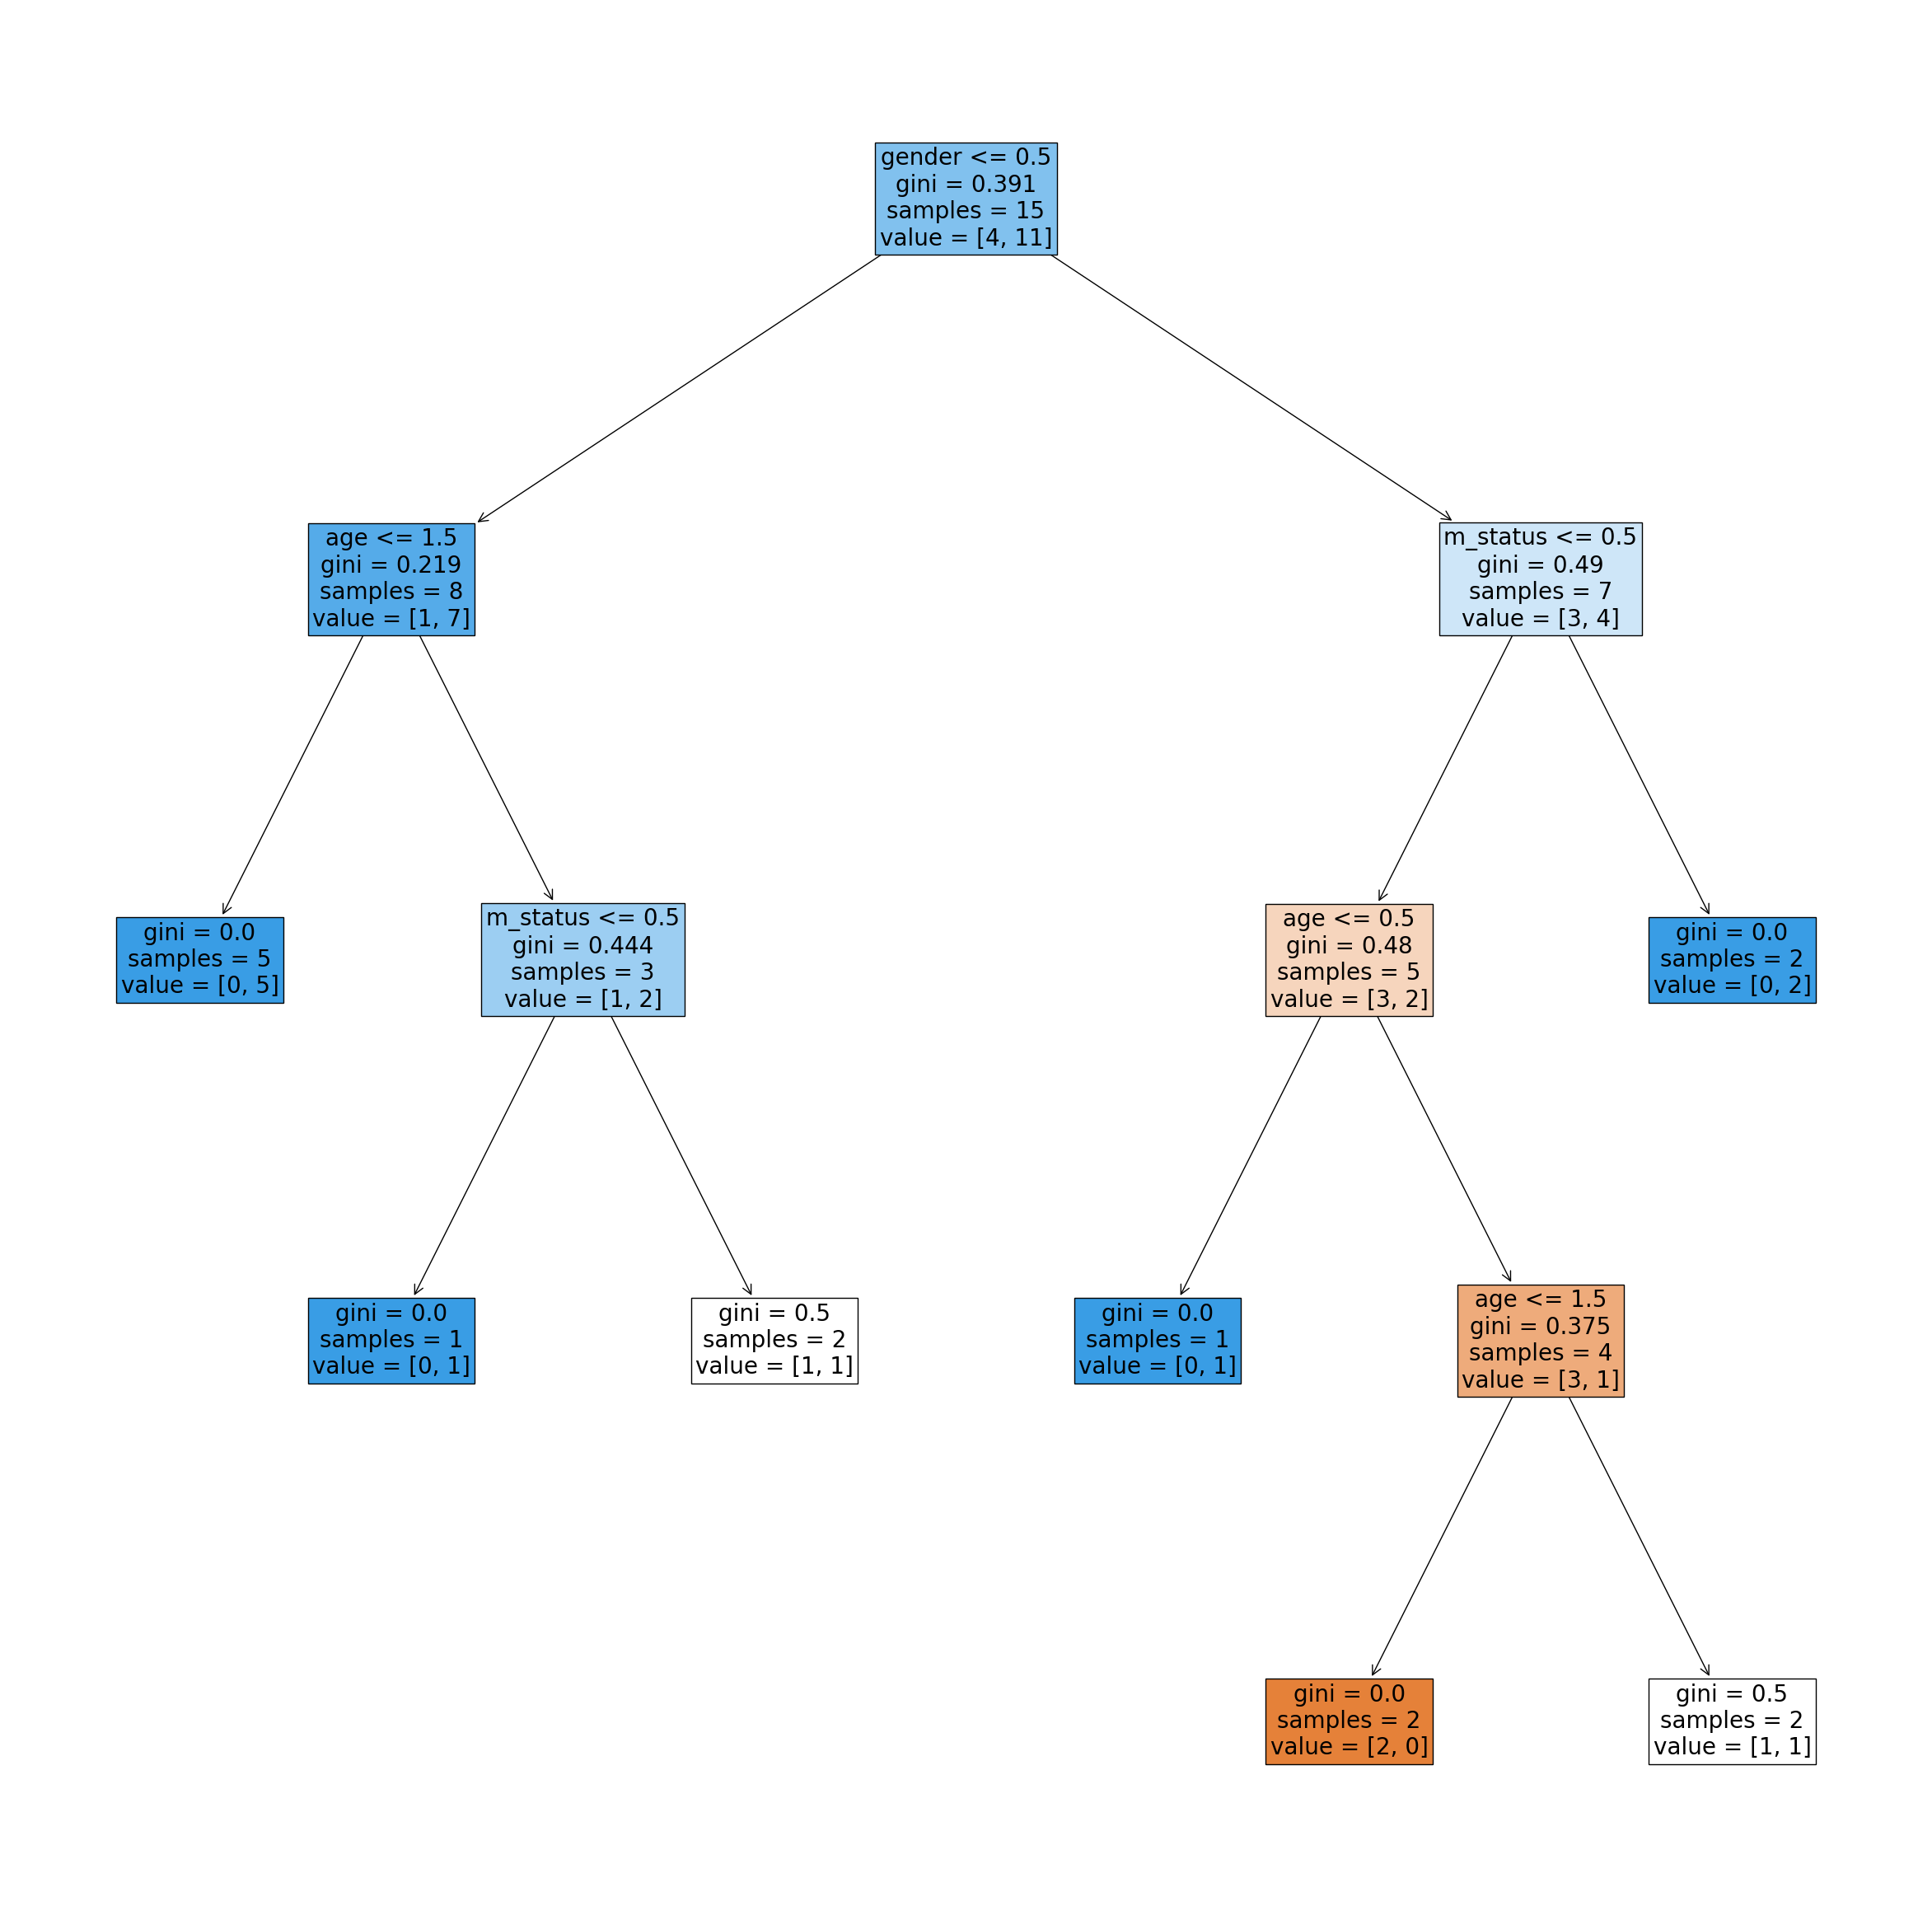

In [30]:
from sklearn import tree
fig = plt.figure(figsize=(30, 30))
tree.plot_tree(dect, feature_names = x.columns.tolist(), filled=True, fontsize=20)